In [1]:
cd D:\Dropbox\data\proj\PE_HYZ\IpythonRecord\2017_GBM_Final_Ready\MesProg_SCP_VFBC

[Errno 2] No such file or directory: 'D:DropboxdataprojPE_HYZIpythonRecord2017_GBM_Final_ReadyMesProg_SCP_VFBC'
/mnt/d/Dropbox/data/proj/PE_HYZ/IpythonRecord/2017_GBM_Final_Ready


In [2]:
import datetime
today=f"{datetime.datetime.now():%Y-%m-%d_%H-%M}"
today

'2021-03-02_14-27'

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
#imports
import pandas as pd
import pickle as pickle
from scipy.spatial.distance import cdist, pdist, squareform
#import backspinpy
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedShuffleSplit  
from collections import defaultdict
from sklearn import preprocessing
import matplotlib.patches as mpatches
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
cd .

/mnt/d/Dropbox/data/proj/PE_HYZ/IpythonRecord/2017_GBM_Final_Ready


In [12]:
dfposi=pd.read_table("/mnt/d/Dropbox/data/proj/PE_HYZ/PublicDataSet/PE_GBM/20190603_Test2_NeuralTube_NeuralCrest_AllCells_uMAP_PositionwithCluster.txt",
                 index_col=0, header=0, sep="\t")

/root/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,

In [13]:
dfposi=dfposi.iloc[-3:,:]

In [14]:
dfposi.head()

,Brain.Mural4_O6,Brain.Mural4_D17,Brain.Mural3_J11,Brain.Mural4_O24,Brain.Mural6_L17,Brain.Mural6_J4,Brain.Mural3_E14,Brain.Mural5_P8,Brain.Mural6_O7,Brain.Mural3_N9,...,Brain.VSMC3_K17,Brain.VSMC3_A10,Brain.VSMC3_I2,Brain.VSMC3_L3,Brain.VSMC3_A2,Brain.VSMC2_M23,Brain.VSMC3_M6,Brain.VSMC2_A3,Brain.VSMC3_F15,Brain.VSMC2_A6
uMAP2,-3.166052758693695,-3.5557348132133484,-3.26658171415329,-2.4849286675453186,-2.8608075976371765,-3.1168681979179382,-1.0304380655288696,-3.7088772654533386,-3.470740020275116,-2.7368666529655457,...,3.1752119064331055,3.3351457118988037,2.8575799465179443,1.2609062194824219,3.4688286781311035,3.195111036300659,3.585280179977417,3.805172920227051,2.921156167984009,3.9093031883239746
uMAP1,-3.8459296226501465,-2.739692211151123,-5.611094951629639,-4.634734630584717,-4.025484561920166,-2.9516096115112305,-1.8954050540924072,-3.1768970489501953,-2.894312620162964,-3.4942238330841064,...,2.297329902648926,2.2667858600616455,1.960544466972351,0.5762342214584351,2.0050559043884277,2.433076858520508,1.6473745107650757,1.9326469898223877,2.196014881134033,1.4081506729125977
Cluster,PC,PC,PC,vSMC,PC,PC,PC,PC,PC,PC,...,AC,AC,AC,AC,AC,AC,AC,AC,AC,AC


In [15]:
dfpfcclus=dfposi.loc["Cluster"]
dfpfcclus.shape

(3218,)

In [16]:
df=dfposi

In [17]:
df.head()

,Brain.Mural4_O6,Brain.Mural4_D17,Brain.Mural3_J11,Brain.Mural4_O24,Brain.Mural6_L17,Brain.Mural6_J4,Brain.Mural3_E14,Brain.Mural5_P8,Brain.Mural6_O7,Brain.Mural3_N9,...,Brain.VSMC3_K17,Brain.VSMC3_A10,Brain.VSMC3_I2,Brain.VSMC3_L3,Brain.VSMC3_A2,Brain.VSMC2_M23,Brain.VSMC3_M6,Brain.VSMC2_A3,Brain.VSMC3_F15,Brain.VSMC2_A6
uMAP2,-3.166052758693695,-3.5557348132133484,-3.26658171415329,-2.4849286675453186,-2.8608075976371765,-3.1168681979179382,-1.0304380655288696,-3.7088772654533386,-3.470740020275116,-2.7368666529655457,...,3.1752119064331055,3.3351457118988037,2.8575799465179443,1.2609062194824219,3.4688286781311035,3.195111036300659,3.585280179977417,3.805172920227051,2.921156167984009,3.9093031883239746
uMAP1,-3.8459296226501465,-2.739692211151123,-5.611094951629639,-4.634734630584717,-4.025484561920166,-2.9516096115112305,-1.8954050540924072,-3.1768970489501953,-2.894312620162964,-3.4942238330841064,...,2.297329902648926,2.2667858600616455,1.960544466972351,0.5762342214584351,2.0050559043884277,2.433076858520508,1.6473745107650757,1.9326469898223877,2.196014881134033,1.4081506729125977
Cluster,PC,PC,PC,vSMC,PC,PC,PC,PC,PC,PC,...,AC,AC,AC,AC,AC,AC,AC,AC,AC,AC


In [18]:
dfposi=dfposi.T

In [21]:
proto = pd.Series({'AC':   'Astro',
                   'Astro':   'Astro',
       'FB1':  'VFBC',
                   'VFBC':'VFBC',
        'FB2': 'VFBC',
         'OL':  'OLIG',
                    'OLIG': 'OLIG',
                   'NB':'NB',
             'Olig':  'OLIG',       
      'PC':'PeriC',
                   'PeriC':'PeriC',
       'aSMC' : 'SMC',
      'aaSMC': 'SMC',
        'vSMC': 'SMC',
       'SMC': 'SMC',
       'autonomic':'NC_auto',
                   'NC_auto':'NC_auto',
                  'delaminatory':'NC_delami', 
                   'NC_delami':'NC_delami',
                   'mesenchyme':'NC_Mes',
                   'NC_Mes':'NC_Mes',
                   'meningeal_fibroblasts':'Meni_FB',
                   'Meni_FB':'Meni_FB',
 'meningeal_neurons':'NB',
                   'Meni_Neuron':'NB',
 'meningeal_radial_glia_like':'Meni_Rgl',
                   'Meni_Rgl':'Meni_Rgl',
        'migratory 1':'NC_Migr',
                   'NC_Migr':'NC_Migr',
 'migratory 2':'NC_Migr',
                   'early migratory':'NC_EarlyMigr',
                   'NC_EarlyMigr':'NC_EarlyMigr',
                   'neural tube':'NeuralTube',
                   'NeuralTube':'NeuralTube',
                  'qRgl':'qRgl',
                   'qNSC1':'qRgl',
 'qNSC2':'qRgl',
                   'aNSC1':'aRgl',
 'aNSC2':'aRgl',
                   'aRgl':'aRgl',
 'sensory':'NC_sensory',
                   'NC_sensory':'NC_sensory'
       })

posict_dev = dfposi['Cluster'].values
posiprotogruop = proto.loc[posict_dev].values
len(posiprotogruop)





3218

In [22]:
dfposi['Cluster']=posiprotogruop

In [23]:
dfposi.head()

,uMAP2,uMAP1,Cluster
Brain.Mural4_O6,-3.166052758693695,-3.8459296226501465,PeriC
Brain.Mural4_D17,-3.5557348132133484,-2.739692211151123,PeriC
Brain.Mural3_J11,-3.26658171415329,-5.611094951629639,PeriC
Brain.Mural4_O24,-2.4849286675453186,-4.634734630584717,SMC
Brain.Mural6_L17,-2.8608075976371765,-4.025484561920166,PeriC


In [273]:
set(dfposi['Cluster'])

{'Astro',
 'Meni_FB',
 'Meni_Rgl',
 'NB',
 'NC_EarlyMigr',
 'NC_Mes',
 'NC_Migr',
 'NC_auto',
 'NC_delami',
 'NC_sensory',
 'NeuralTube',
 'OLIG',
 'PeriC',
 'SMC',
 'VFBC',
 'aRgl',
 'qRgl'}

In [29]:
cd /mnt/d/Dropbox/Lab work/Project/GBM_Ready/201907Figures/Figure3/FateDecisioni

/mnt/d/Dropbox/Lab work/Project/GBM_Ready/201907Figures/Figure3/FateDecisioni


In [281]:
dfumapmerg=pd.read_table("20200305AllGBM_BranchTree_Coord_withColor.tab", index_col =0 ,header=0, sep="\t")
dfumapmerg.shape

(3064, 18)

In [282]:
dfumapmerg.head()

,Cluster,Group,Louvain,NumIndex,Tree_X,Tree_Y,UMAP1,UMAP2,Tree_Color,dpt,index,newX,newY,S_phase,G2M_phase,S-G2M,Cell_Cycle,Only_Cycling
KI003-1773-030-092-H11,CL6_KI03.07,ASTRO,4,880,-0.471269,1.961573,-0.473042,1.980331,#ff0000,0.636309,-0.473042,0.242576,1.746169,-0.054959,-2.518926,2.463967,gray,grey
KI003-1773-030-093-B01,CL6_KI03.07,ASTRO,4,887,-0.466562,1.970085,-0.459838,1.985764,#fe0000,0.526505,-0.459838,-0.186609,1.867350,1.693763,-0.876873,2.570636,#ffcf00,grey
KI016-1773-033-195-F01,CL8_KI16,ASTRO,8,1201,-0.461856,1.978598,-0.431218,1.976119,#fe0001,0.539192,-0.431218,-0.786465,2.166156,-0.622699,-1.316274,0.693574,gray,grey
KI006-1773-017-081-C04,CL7_KI06,ASTRO,1,999,-0.457149,1.987111,-0.481726,2.013467,#fd0001,0.323385,-0.481726,-0.495080,2.311531,-0.608640,-1.754964,1.146324,gray,grey
KI016-1773-033-197-E06,CL8_KI16,ASTRO,7,1251,-0.452442,1.995625,-0.474867,2.014405,#fc0002,0.929061,-0.474867,NaN,NaN,-0.561605,-2.335994,1.774389,gray,grey


dfumapnt = pd.read_table("/data/proj/PE_HYZ/PublicDataSet/PE_GBM/20190801_Manu_Ready_CL_PN_NLTumors_fit_toNTcells_FullGene.txt", index_col =0 ,header=0, sep="\t")
dfumapnt.shape

dfumapnc = pd.read_table("/data/proj/PE_HYZ/PublicDataSet/PE_GBM/20190731MesTumors_fit_toNCcells_FullGene.txt", index_col =0 ,header=0, sep="\t")
dfumapnc.shape

dfumapnt.head()

dfumapnc.head()

dfumapmerg=dfumapnc.append(dfumapnt)
dfumapmerg.shape

In [284]:
dfumapmerg=dfumapmerg[["Group","Tree_X","Tree_Y","Tree_Color"]]
dfumapmerg.head()

,Group,Tree_X,Tree_Y,Tree_Color
KI003-1773-030-092-H11,ASTRO,-0.471269,1.961573,#ff0000
KI003-1773-030-093-B01,ASTRO,-0.466562,1.970085,#fe0000
KI016-1773-033-195-F01,ASTRO,-0.461856,1.978598,#fe0001
KI006-1773-017-081-C04,ASTRO,-0.457149,1.987111,#fd0001
KI016-1773-033-197-E06,ASTRO,-0.452442,1.995625,#fc0002


In [285]:
dfumapmerg.head()

,Group,Tree_X,Tree_Y,Tree_Color
KI003-1773-030-092-H11,ASTRO,-0.471269,1.961573,#ff0000
KI003-1773-030-093-B01,ASTRO,-0.466562,1.970085,#fe0000
KI016-1773-033-195-F01,ASTRO,-0.461856,1.978598,#fe0001
KI006-1773-017-081-C04,ASTRO,-0.457149,1.987111,#fd0001
KI016-1773-033-197-E06,ASTRO,-0.452442,1.995625,#fc0002


In [36]:
dfgbm = pd.read_table("/mnt/d/Dropbox/data/proj/PE_HYZ/PublicDataSet/GBMprim_UMI_WithCluster_New.tab", index_col =0 ,header=0, sep="\t")
dfgbm.shape

/root/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,

(20129, 4073)

In [37]:
dfgbm.tail()

,KI009-1772-122-307-D03,KI009-1772-122-307-F03,KI009-1772-122-307-H04,KI009-1772-122-307-E12,KI009-1772-122-308-D03,KI009-1772-122-308-A08,KI009-1772-122-308-C08,KI009-1772-122-308-G09,KI009-1772-122-308-G10,KI009-1772-122-308-H10,...,KI009-1772-122-308-G07,KI009-1772-122-308-H07,KI009-1772-122-308-D08,KI009-1772-122-308-E09,KI009-1772-122-308-H09,KI009-1772-122-308-A10,KI009-1772-122-308-F10,KI009-1772-122-308-A11,KI009-1772-122-308-B11,KI009-1772-122-308-H11
CDY1-loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SPRY3-loc2,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
VAMP7-loc1,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,2,0,0,1,0,0
IL9R-loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cluster,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,...,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09


In [286]:
dfumapmerg.columns=['Cluster', 'Tree_X', 'Tree_Y',"Tree_Color"]

dfumapmerg=dfumapmerg.join(dfgbm.iloc[-1,:].T,how="inner")
dfumapmerg.shape

In [287]:
set(dfumapmerg["Cluster"])

{'ASTRO', 'NB', 'NC_Peri', 'NT_STEM', 'OLIG'}

In [274]:
mwanted_order =[
  
 
 'NB', 'qRgl',
 'Astro',
 'OLIG',
    'SMC',
 'PeriC',
    'VFBC','Meni_FB',
  'NC_Mes', 'NC_auto',
     'NC_Migr',
    'NC_EarlyMigr',
 'NC_delami','NeuralTube',
 
  'Meni_Rgl',
 'aRgl',


 ]
#mreorder_ix = [list(mclasses_names).index(i) for i in mwanted_order]
#mbool00 = in1d( mclasses_names[mclasses_index],  mwanted_order )
mcolor_dict = pd.Series({'Astro':( 50, 80, 80),'VFBC':  ( 10, 10, 250),'FB2': (100,100, 165)  ,'NB':(100, 100, 240) ,
                         'OL':   (117, 245, 7) ,
              'OLIG':    (111,111,111), 'PeriC': (217, 215,   7)  ,'aRgl':    (180, 140, 130),
              'aNSC2':  (100, 180, 240),  'SMC': ( 80, 235, 255),'aaSMC':(139,69,19),
             'NC_auto':(10, 120, 190), 'NC_delami':(230, 10, 100), 'NC_EarlyMigr':  (120, 15,215),
             'Meni_FB':   (190,  10,  10),'Meni_Neuron': (225, 160,  30),
                       'Meni_Rgl':    ( 159,155,110),
           'NC_Mes': (69,155,110)  ,'migratory 1': (215, 105,  30) , 'NC_Migr':  (190, 200, 190),'NeuralTube':   ( 50, 180, 180),
                         'qRgl':  (  10, 10, 250),'qNSC2': (215, 105,  30),'NC_sensory':  (79,47,79)   ,
              'vSMC':    (170, 180, 170),})
mcolor_dict = mcolor_dict.map(lambda x: list(map(lambda y: y/255., x)))
mwanted_order

['NB',
 'qRgl',
 'Astro',
 'OLIG',
 'SMC',
 'PeriC',
 'VFBC',
 'Meni_FB',
 'NC_Mes',
 'NC_auto',
 'NC_Migr',
 'NC_EarlyMigr',
 'NC_delami',
 'NeuralTube',
 'Meni_Rgl',
 'aRgl']

In [275]:
wanted_orderclpn =['ASTRO', 'NB', 'NC_Peri', 'NT_STEM', 'OLIG']
#bool00clpn=array([True]*len(df_train_setclpn.columns))
#reorder_ixclpn = [list(classes_namesclpn).index(i) for i in wanted_orderclpn]
color_dictclpn = pd.Series({'CL1_KI09':  ( 10, 10, 250),'CL2_KI12': (215, 105,  30),'CL3_KI07':   (117, 245, 7) ,
              'PN1_KI15.12.08.01':    (111,111,111),'CL5_KI01': (79,47,79)  ,'PN2_KI15':    (180, 140, 130),
              'CL4_KI12':  (100, 180, 240),'MS8_KI16': ( 80, 235, 255),'CL6_KI03.07':(139,69,19),
              'CL7_KI06':(10, 120, 190),'CL8_KI16':(230, 10, 100),'NL1_KI15.12':  (120, 15,215),
            'MS1_KI24':   (190,  10,  10),'MS2_KI09': (225, 160,  30),'MS3':   (217, 245,   7) ,
            'MS4_KI09': (69,155,110)  ,'MS5':  (100, 100, 240),'MS6_KI17.05':  (190, 200, 190),'MS7_KI09':   ( 50, 180, 180),
                            'ASTRO':(120, 15,215), 'OLIG': (225, 160,  30),'NB':  ( 10, 10, 250), 'NT_STEM':   (190,  10,  10),'NC_Peri': (69,155,110) , 
                         'KI001':  (  10, 10, 250),'KI002': (215, 105,  30),'KI003':   ( 69,155,110) ,
              'KI005':    (170, 180, 170),'KI006': (100,100, 165)  ,'KI007':    (180, 140, 130),
              'KI008':  (100, 180, 240),'KI009': ( 80, 235, 255),'KI012':(190,  60,  10),
              'KI013':(10, 120, 190),'KI014':(230, 10, 100),'KI015':  (120, 15,215),
            'KI016':   (190,  10,  10),'KI017': (225, 160,  30),'KI020':   (217, 245,   7) ,
            'KI021': (117, 245,   7)  ,'KI023':  (111,111,111),'KI024':  ( 50, 180, 180)})
color_dictclpn = color_dictclpn.map(lambda x: list(map(lambda y: y/255., x)))
#newcolorsclpn = array(list(color_dictclpn[dfclpncol.ix[:,df_train_setclpn.columns].ix['Cluster']].values))


In [276]:
dfposi.head()

,uMAP2,uMAP1,Cluster
Brain.Mural4_O6,-3.166052758693695,-3.8459296226501465,PeriC
Brain.Mural4_D17,-3.5557348132133484,-2.739692211151123,PeriC
Brain.Mural3_J11,-3.26658171415329,-5.611094951629639,PeriC
Brain.Mural4_O24,-2.4849286675453186,-4.634734630584717,SMC
Brain.Mural6_L17,-2.8608075976371765,-4.025484561920166,PeriC


In [277]:
dfumapmerg.head()

,Cluster,Tree_X,Tree_Y
KI003-1773-030-092-H11,ASTRO,-0.471269,1.961573
KI003-1773-030-093-B01,ASTRO,-0.466562,1.970085
KI016-1773-033-195-F01,ASTRO,-0.461856,1.978598
KI006-1773-017-081-C04,ASTRO,-0.457149,1.987111
KI016-1773-033-197-E06,ASTRO,-0.452442,1.995625


# Annotation of WheelPlot locations to Loom File

In [45]:
import loompy
import getopt
import sys
import os
import pandas as pd

In [46]:
# We need the cluster annotation file

In [47]:
cd .

/mnt/d/Dropbox/Lab work/Project/GBM_Ready/201907Figures/Figure3/FateDecisioni


In [158]:
ds=loompy.connect("/mnt/d/Dropbox/data/proj/PE_HYZ/PublicDataSet/PE_GBM/20201106_nonhead_NN_New_mDG_GBMFinal_DevMouseBrain.loom")

In [49]:
#df = pd.read_table("/mnt/d/Dropbox/data/proj/PE_HYZ/PublicDataSet/Developmental_mouse brain/20201103_NewTree_Plot_All_GBM_SkipNeuralEpiProg.tab",index_col=0,header=0,sep="\t")

In [159]:
df=dfumapmerg.T
df.head(10)

,KI003-1773-030-092-H11,KI003-1773-030-093-B01,KI016-1773-033-195-F01,KI006-1773-017-081-C04,KI016-1773-033-197-E06,KI003-1773-030-093-B04,KI012-1773-017-088-E07,KI012-1773-030-083-F05,KI007-1773-017-085-F03,KI016-1773-033-194-C08,...,KI020-1773-026-011-D12,KI008-1773-010-002-C06,KI021-1773-033-247-C07,KI008-1773-017-080-G09,KI009-1773-030-084-H05,KI021-1773-033-247-H09,KI020-1773-026-011-C03,KI016-1773-033-248-B10,KI021-1773-033-246-H04,KI021-1773-033-246-H10
Cluster,ASTRO,ASTRO,ASTRO,ASTRO,ASTRO,ASTRO,ASTRO,ASTRO,ASTRO,ASTRO,...,NC_Peri,NC_Peri,NC_Peri,NC_Peri,NC_Peri,NC_Peri,NC_Peri,NC_Peri,NC_Peri,NC_Peri
Tree_X,-0.471269,-0.466562,-0.461856,-0.457149,-0.452442,-0.447735,-0.443029,-0.438322,-0.433615,-0.428908,...,1.84916,1.85275,1.85633,1.85992,1.8635,1.86709,1.87068,1.87426,1.87785,1.88143
Tree_Y,1.96157,1.97008,1.9786,1.98711,1.99562,2.00414,2.01265,2.02117,2.02968,2.0382,...,0.0650619,0.0675805,0.0701019,0.0726261,0.0751531,0.077683,0.0802157,0.0827513,0.0852897,0.0878311


2021-03-02 15:34:00,543 - DEBUG - update_title_pos
2021-03-02 15:34:00,819 - DEBUG - update_title_pos
2021-03-02 15:34:00,882 - DEBUG - update_title_pos
2021-03-02 15:34:00,924 - DEBUG - update_title_pos


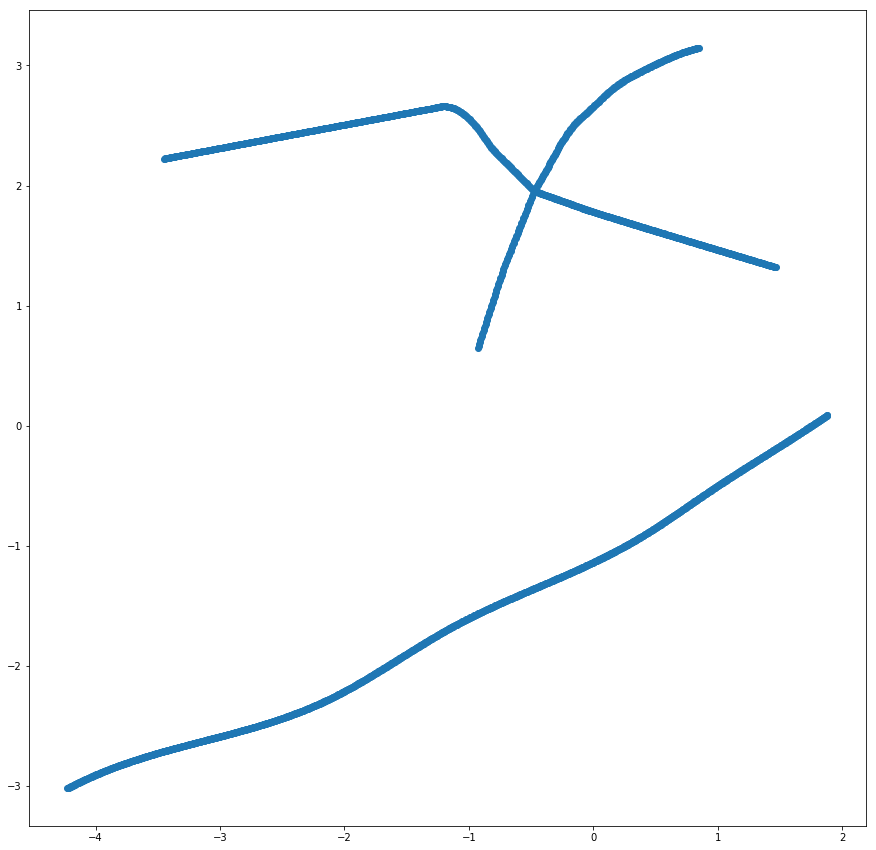

In [160]:
plt.figure(figsize=(15,15), facecolor='w')
plt.scatter(df.loc["Tree_X"],df.loc["Tree_Y"])

In [161]:
cd .

/mnt/d/Dropbox/Lab work/Project/GBM_Ready/201907Figures/Figure3/FateDecisioni


In [163]:
dflist=df.columns.tolist()
newdflist=[]
for item in dflist:
    newdflist.append(item.upper())
df.columns=newdflist

In [164]:
df.head(10)

,KI003-1773-030-092-H11,KI003-1773-030-093-B01,KI016-1773-033-195-F01,KI006-1773-017-081-C04,KI016-1773-033-197-E06,KI003-1773-030-093-B04,KI012-1773-017-088-E07,KI012-1773-030-083-F05,KI007-1773-017-085-F03,KI016-1773-033-194-C08,...,KI020-1773-026-011-D12,KI008-1773-010-002-C06,KI021-1773-033-247-C07,KI008-1773-017-080-G09,KI009-1773-030-084-H05,KI021-1773-033-247-H09,KI020-1773-026-011-C03,KI016-1773-033-248-B10,KI021-1773-033-246-H04,KI021-1773-033-246-H10
Cluster,ASTRO,ASTRO,ASTRO,ASTRO,ASTRO,ASTRO,ASTRO,ASTRO,ASTRO,ASTRO,...,NC_Peri,NC_Peri,NC_Peri,NC_Peri,NC_Peri,NC_Peri,NC_Peri,NC_Peri,NC_Peri,NC_Peri
Tree_X,-0.471269,-0.466562,-0.461856,-0.457149,-0.452442,-0.447735,-0.443029,-0.438322,-0.433615,-0.428908,...,1.84916,1.85275,1.85633,1.85992,1.8635,1.86709,1.87068,1.87426,1.87785,1.88143
Tree_Y,1.96157,1.97008,1.9786,1.98711,1.99562,2.00414,2.01265,2.02117,2.02968,2.0382,...,0.0650619,0.0675805,0.0701019,0.0726261,0.0751531,0.077683,0.0802157,0.0827513,0.0852897,0.0878311


In [165]:
#Check how many cells shared in both loom and clustered cells

In [166]:
commonlist=list(set(newdflist) & set(ds.ca.CellID))
len(commonlist)

2510

In [167]:
#if loom file have the cell, valid list "YES", and add Cluster Name list "df[item][0]"

In [168]:
df.head()

,KI003-1773-030-092-H11,KI003-1773-030-093-B01,KI016-1773-033-195-F01,KI006-1773-017-081-C04,KI016-1773-033-197-E06,KI003-1773-030-093-B04,KI012-1773-017-088-E07,KI012-1773-030-083-F05,KI007-1773-017-085-F03,KI016-1773-033-194-C08,...,KI020-1773-026-011-D12,KI008-1773-010-002-C06,KI021-1773-033-247-C07,KI008-1773-017-080-G09,KI009-1773-030-084-H05,KI021-1773-033-247-H09,KI020-1773-026-011-C03,KI016-1773-033-248-B10,KI021-1773-033-246-H04,KI021-1773-033-246-H10
Cluster,ASTRO,ASTRO,ASTRO,ASTRO,ASTRO,ASTRO,ASTRO,ASTRO,ASTRO,ASTRO,...,NC_Peri,NC_Peri,NC_Peri,NC_Peri,NC_Peri,NC_Peri,NC_Peri,NC_Peri,NC_Peri,NC_Peri
Tree_X,-0.471269,-0.466562,-0.461856,-0.457149,-0.452442,-0.447735,-0.443029,-0.438322,-0.433615,-0.428908,...,1.84916,1.85275,1.85633,1.85992,1.8635,1.86709,1.87068,1.87426,1.87785,1.88143
Tree_Y,1.96157,1.97008,1.9786,1.98711,1.99562,2.00414,2.01265,2.02117,2.02968,2.0382,...,0.0650619,0.0675805,0.0701019,0.0726261,0.0751531,0.077683,0.0802157,0.0827513,0.0852897,0.0878311


# Velocity

In [82]:
import pandas as pd

In [83]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import loompy
import velocyto as vcy
import logging
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.interpolate import interp1d

logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
%matplotlib inline
plt.rcParams['pdf.fonttype'] = 42

2021-03-02 14:37:22,047 - DEBUG - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [84]:
# plotting utility functions
def despline():
    ax1 = plt.gca()
    # Hide the right and top spines
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')
    
def minimal_xticks(start, end):
    end_ = np.around(end, -int(np.log10(end))+1)
    xlims = np.linspace(start, end_, 5)
    xlims_tx = [""]*len(xlims)
    xlims_tx[0], xlims_tx[-1] = f"{xlims[0]:.0f}", f"{xlims[-1]:.02f}"
    plt.xticks(xlims, xlims_tx)

    
def minimal_yticks(start, end):
    end_ = np.around(end, -int(np.log10(end))+1)
    ylims = np.linspace(start, end_, 5)
    ylims_tx = [""]*len(ylims)
    ylims_tx[0], ylims_tx[-1] = f"{ylims[0]:.0f}", f"{ylims[-1]:.02f}"
    plt.yticks(ylims, ylims_tx)

In [85]:
def ixs_thatsort_a2b(a: np.ndarray, b: np.ndarray, check_content: bool=True) -> np.ndarray:
    "This is super duper magic sauce to make the order of one list to be like another"
    if check_content:
        assert len(np.intersect1d(a, b)) == len(a), f"The two arrays are not matching"
    return np.argsort(a)[np.argsort(np.argsort(b))]

def despline():
    ax1 = plt.gca()
    # Hide the right and top spines
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')

In [86]:
dp = dict(min_expr_counts=8,
          min_cells_express=2,
          N=1500,
          min_expr_counts_U=4,
          min_cells_express_U=3,
          min_avg_U=0.008,
          min_avg_S=0.08,
          n_comps = 20,
          limit_gamma=False,
          fit_offset=False,
          n_neighbors = 30,
          k = 50)

In [87]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [88]:
from urllib.request import urlretrieve
urlretrieve("http://pklab.med.harvard.edu/velocyto/Haber_et_al/goatools_cellcycle_genes.txt",
            "data/goatools_cellcycle_genes.txt")

('data/goatools_cellcycle_genes.txt',
 <http.client.HTTPMessage at 0x7f0f700c8630>)

In [193]:
cd .

/mnt/d/Dropbox/Lab work/Project/GBM_Ready/201907Figures/Figure3/FateDecisioni


In [90]:
cell_cycle_genes = open("/mnt/d/Dropbox/data/proj/PE_HYZ/PublicDataSet/PANTHER_cell_cycle_genes20180701.txt").read().split()

In [91]:
pwd

'/mnt/d/Dropbox/Lab work/Project/GBM_Ready/201907Figures/Figure3/FateDecisioni'

In [206]:
# Crate an analysis object
vlm = vcy.VelocytoLoom("/mnt/d/Dropbox/data/proj/PE_HYZ/PublicDataSet/PE_GBM/20201106_nonhead_NN_New_mDG_GBMFinal_DevMouseBrain.loom")  # CHANGE THIS PATH TO YOUR LOCAL PATH

In [207]:
vlm.ra["Gene"][1:10]

array(['MIR6859-1', 'FAM138A', 'AL627309.1', 'AL627309.3', 'AL627309.6',
       'AL627309.7', 'AL627309.2', 'AL627309.5', 'RNU6-1100P'],
      dtype=object)

In [208]:
vlm.ca.keys()

dict_keys(['CellID', 'Cluster', 'PatientID', 'UMAP3', 'UMAP_x', 'UMAP_y', 'UMAP_z', 'Valid', 'WP_x', 'WP_y'])

In [209]:
vlm.ca['Valid'][:10]

array(['NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES'],
      dtype=object)

In [210]:
set(vlm.ca['Valid'])

{'NO', 'YES'}

In [211]:
set(vlm.ca["Cluster"])

{'ASTRO', 'NB', 'NC_Peri', 'NONE', 'NT_STEM', 'OLIG'}

In [212]:
vlm.filter_cells(np.in1d(vlm.ca['Valid'], ["YES"]))

In [213]:
set(vlm.ca["Cluster"])

{'ASTRO', 'NB', 'NC_Peri', 'NONE', 'NT_STEM', 'OLIG'}

In [214]:
vlm.filter_cells(~np.in1d(vlm.ca['Cluster'], ['NONE','CD45+']))

In [215]:
set(vlm.ca["Cluster"])

{'ASTRO', 'NB', 'NC_Peri', 'NT_STEM', 'OLIG'}

In [216]:
vlm.filter_cells(np.in1d(vlm.ca['Cluster'], ['ASTRO', 'NB', 'NC_Peri', 'NONE', 'NT_STEM', 'OLIG']))

In [217]:
np.in1d(vlm.ca['Valid'], ["YES"])

array([ True,  True,  True, ...,  True,  True,  True])

vlm.shape

In [218]:
vlm.ca["Valid"]

array(['YES', 'YES', 'YES', ..., 'YES', 'YES', 'YES'], dtype=object)

In [219]:
set(vlm.ca["Cluster"])

{'ASTRO', 'NB', 'NC_Peri', 'NT_STEM', 'OLIG'}

# Extra filtering

## Remove low detection

Text(0, 0.5, 'unspliced')

2021-03-02 15:48:02,186 - DEBUG - update_title_pos
2021-03-02 15:48:02,259 - DEBUG - update_title_pos
2021-03-02 15:48:02,316 - DEBUG - update_title_pos
2021-03-02 15:48:02,369 - DEBUG - update_title_pos


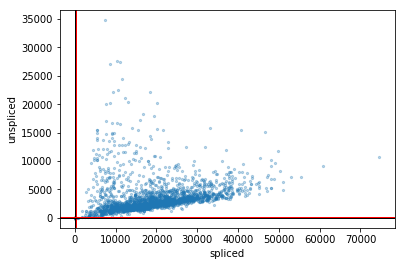

In [220]:
plt.scatter(vlm.initial_cell_size, vlm.initial_Ucell_size, alpha=0.3, s=5)
plt.axvline(300, c="r", lw=1)
plt.axvline(np.percentile(vlm.initial_cell_size, 1), c="k", lw=1)
plt.axhline(200, c="r", lw=1)
plt.axhline(np.percentile(vlm.initial_Ucell_size, 1), c="k", lw=1)
plt.xlabel("spliced"); plt.ylabel("unspliced")

In [221]:
vlm.filter_cells(bool_array=(vlm.initial_Ucell_size > 200) & (vlm.initial_cell_size > 200))

## Merge some labels

In [222]:
set(vlm.ca["Cluster"])

{'ASTRO', 'NB', 'NC_Peri', 'NT_STEM', 'OLIG'}

# Read column attributes form the loom file and specify colors
colors_dict = {#'CL1_KI09':np.array([137, 34, 81]),
 #'CL2_KI12':np.array([30, 162, 209]),
 #'CL3_KI07':np.array([224, 139, 183]),
 #'CL4_KI12':np.array([52, 127, 184]),
#'CL5_KI01':np.array([50, 81, 156]),
'MS1_KI24':np.array([107, 194, 165]),
'MS2_KI09':np.array([225,34,46]),
 'MS3':np.array([190,190,190]),
 'MS4_KI09':np.array([37,139,72]),
  'MS5':np.array([249,214,64]),
  'MS6_KI17.05':np.array([164,209,235]),
  'MS7_KI09':np.array([223,127,49]),
  #'NL1_KI15.12':np.array([164,87,44]),
    #'PN1_KI16':np.array([194,67,14]),
 #'PN2_KI03.07':np.array([235,64,196]),
 #'PN3_KI06':np.array([105,164,216]),
 #'PN4_KI16':np.array([15,104,36]),
  'PN5_KI15.12.08.01':np.array([224, 139, 104]),
#'PN6_KI15':np.array([96, 97, 96])}
colors_dict = {k:v/256 for k, v in colors_dict.items()}
#vlm.ca["Celltype"][np.in1d(vlm.ca["Celltype"], ["TA.G1", "TA.G2"])] = "TA"
vlm.set_clusters(vlm.ca["Cluster"], cluster_colors_dict=colors_dict)

In [223]:
# Read column attributes form the loom file and specify colors
colors_dict = { 
   'NT_STEM':   np.array([190,  10,  10]),
    'OLIG': np.array([225, 160,  30]),
 
   'NC_Peri':   np.array([69,155,110]),
   'ASTRO':  np.array([100, 100, 240]),
  
   'NB':np.array([ 80, 235, 255])}
colors_dict = {k:v/256 for k, v in colors_dict.items()}
#vlm.ca["Celltype"][np.in1d(vlm.ca["Celltype"], ["TA.G1", "TA.G2"])] = "TA"
vlm.set_clusters(vlm.ca["Cluster"], cluster_colors_dict=colors_dict)

2021-03-02 15:48:18,004 - WARNING - 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2021-03-02 15:48:18,009 - WARNING - 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2021-03-02 15:48:18,015 - WARNING - 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2021-03-02 15:48:18,020 - WARNING - 'c' arg

(0.8, 2.0, -4.0, 10.0)

2021-03-02 15:48:18,048 - DEBUG - update_title_pos
2021-03-02 15:48:18,090 - DEBUG - update_title_pos
2021-03-02 15:48:18,114 - DEBUG - update_title_pos
2021-03-02 15:48:18,137 - DEBUG - update_title_pos


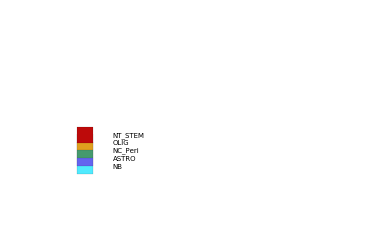

In [224]:
for zz, (k, v) in enumerate(list(colors_dict.items())[::-1]):
    plt.scatter(1, zz/2., c=v, marker="s", lw=0.1, edgecolor="k", s=250)
    plt.text(1.1, zz/2., k, fontdict={"va":"center", "size":7})
plt.xlim(0.8,2)
plt.ylim(-4,10)
plt.axis("off")

In [225]:
dict(zip(*np.unique(vlm.ca["Cluster"], return_counts=1))) 

{'ASTRO': 247, 'NB': 471, 'NC_Peri': 1309, 'NT_STEM': 360, 'OLIG': 64}

In [226]:
cellamount_dict = {
'ASTRO': 247, 'NB': 471, 'NC_Peri': 1309, 'NT_STEM': 360, 'OLIG': 64}

In [227]:
dict(zip(*np.unique(vlm.ca["Cluster"], return_counts=1))) ==cellamount_dict

True

# Downsample cells

In [228]:
from scipy.stats.mstats import gmean, hmean

In [229]:
#tosample = int(np.ceil(np.mean(np.unique(vlm.ca["Cluster"], return_counts=1)[1]))*3.5)
#tosample = int(np.sum(np.unique(vlm.ca["Cluster"], return_counts=1)[1])/(len(cellamount_dict)))
tosample = int(np.sum(np.unique(vlm.ca["Cluster"], return_counts=1)[1]))
np.random.seed(39900715)
downsaple_ixs = []
for ct in np.unique(vlm.ca["Cluster"]):
    ixs = np.where(vlm.ca["Cluster"] == ct)[0]
    downsaple_ixs.append(np.random.choice(ixs, min(tosample, len(ixs)), replace=False))
downsaple_ixs = np.concatenate(downsaple_ixs)
len(downsaple_ixs)

2451

In [230]:
len(cellamount_dict)

5

In [231]:
int(np.ceil(np.mean(np.unique(vlm.ca["Cluster"], return_counts=1)[1])))

491

In [232]:
np.unique(vlm.ca["Cluster"])

array(['ASTRO', 'NB', 'NC_Peri', 'NT_STEM', 'OLIG'], dtype=object)

In [233]:
vlm.filter_cells(bool_array=np.in1d(np.arange(vlm.S.shape[1]), downsaple_ixs))

# Diagnostics

vlm.plot_fractions()

In [234]:
dfgbm=dfgbm.iloc[:-1,:].astype(int)
dfgbm.shape

(20127, 4073)

In [235]:
dfgbm.tail()

,KI009-1772-122-307-D03,KI009-1772-122-307-F03,KI009-1772-122-307-H04,KI009-1772-122-307-E12,KI009-1772-122-308-D03,KI009-1772-122-308-A08,KI009-1772-122-308-C08,KI009-1772-122-308-G09,KI009-1772-122-308-G10,KI009-1772-122-308-H10,...,KI009-1772-122-308-G07,KI009-1772-122-308-H07,KI009-1772-122-308-D08,KI009-1772-122-308-E09,KI009-1772-122-308-H09,KI009-1772-122-308-A10,KI009-1772-122-308-F10,KI009-1772-122-308-A11,KI009-1772-122-308-B11,KI009-1772-122-308-H11
DAZ2-loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BPY2-loc3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CDY1-loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SPRY3-loc2,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
VAMP7-loc1,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,2,0,0,1,0,0


In [236]:
dftest=dfgbm.loc[dfgbm.sum(1)>0]
dftest.shape

(17427, 4073)

In [237]:
backup=vlm
len(backup.ra["Gene"])

58395

In [238]:
vlm=backup
len(vlm.ra["Gene"])

58395

In [239]:
vlm.filter_genes(by_custom_array=~np.in1d(vlm.ra["Gene"], cell_cycle_genes))

2021-03-02 15:49:19,135 - DEBUG - Filtering by custom boolean array


In [240]:
vlm.filter_genes(by_custom_array=np.in1d(vlm.ra['Gene'], dftest.index.tolist()))
len(vlm.ra["Gene"])

2021-03-02 15:49:43,570 - DEBUG - Filtering by custom boolean array


14228

In [241]:
vlm.score_detection_levels(min_expr_counts=0, min_cells_express=0,
                           min_expr_counts_U=dp["min_expr_counts_U"], min_cells_express_U=dp["min_cells_express_U"])
vlm.score_cluster_expression(min_avg_U=dp["min_avg_U"], min_avg_S=dp["min_avg_S"])
vlm.filter_genes(by_detection_levels=True, by_cluster_expression=True)

2021-03-02 15:49:44,267 - INFO - Cluster: b'ASTRO' (247 cells)
2021-03-02 15:49:44,408 - INFO - Cluster: b'NB' (471 cells)
2021-03-02 15:49:44,640 - INFO - Cluster: b'NC_Peri' (1309 cells)
2021-03-02 15:49:45,500 - INFO - Cluster: b'NT_STEM' (360 cells)
2021-03-02 15:49:45,685 - INFO - Cluster: b'OLIG' (64 cells)
2021-03-02 15:49:45,719 - DEBUG - Filtering by cluster expression
2021-03-02 15:49:45,721 - DEBUG - Filtering by detection level


In [242]:
len(vlm.ra["Gene"])

8882

In [243]:
combined_size = (vlm.S.sum(0) / np.percentile(vlm.S.sum(0), 95)) + (vlm.initial_cell_size / np.percentile(vlm.initial_cell_size, 95))
combined_Usize = (vlm.U.sum(0) / np.percentile(vlm.U.sum(0), 95)) + (vlm.initial_Ucell_size / np.percentile(vlm.initial_Ucell_size, 95))
vlm._normalize_S(relative_size=0.25*combined_size*np.median(vlm.S.sum(0)),
                 target_size=np.median(vlm.S.sum(0)))
vlm._normalize_U(relative_size=0.5*combined_Usize*np.median(vlm.U.sum(0)),
                 target_size=np.median(vlm.U.sum(0)))

6

2021-03-02 15:50:36,727 - DEBUG - update_title_pos
2021-03-02 15:50:36,783 - DEBUG - update_title_pos
2021-03-02 15:50:36,836 - DEBUG - update_title_pos
2021-03-02 15:50:36,866 - DEBUG - update_title_pos


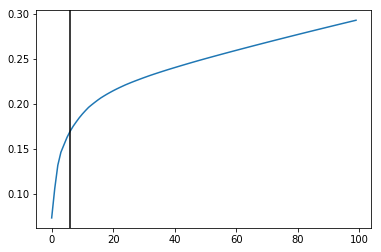

In [244]:
vlm.perform_PCA()
plt.plot(np.cumsum(vlm.pca.explained_variance_ratio_)[:100])
n_comps = np.where(np.diff(np.diff(np.cumsum(vlm.pca.explained_variance_ratio_))>0.0055))[0][0]
plt.axvline(n_comps, c="k"); n_comps

Text(0, 0.5, 'PC5')

2021-03-02 15:50:37,078 - DEBUG - update_title_pos
2021-03-02 15:50:37,185 - DEBUG - update_title_pos
2021-03-02 15:50:37,271 - DEBUG - update_title_pos
2021-03-02 15:50:37,343 - DEBUG - update_title_pos
2021-03-02 15:50:37,520 - DEBUG - update_title_pos
2021-03-02 15:50:37,562 - DEBUG - update_title_pos
2021-03-02 15:50:37,615 - DEBUG - update_title_pos
2021-03-02 15:50:37,646 - DEBUG - update_title_pos
2021-03-02 15:50:37,736 - DEBUG - update_title_pos
2021-03-02 15:50:37,781 - DEBUG - update_title_pos
2021-03-02 15:50:37,819 - DEBUG - update_title_pos
2021-03-02 15:50:37,871 - DEBUG - update_title_pos
2021-03-02 15:50:37,899 - DEBUG - update_title_pos
2021-03-02 15:50:37,987 - DEBUG - update_title_pos
2021-03-02 15:50:38,072 - DEBUG - update_title_pos
2021-03-02 15:50:38,145 - DEBUG - update_title_pos


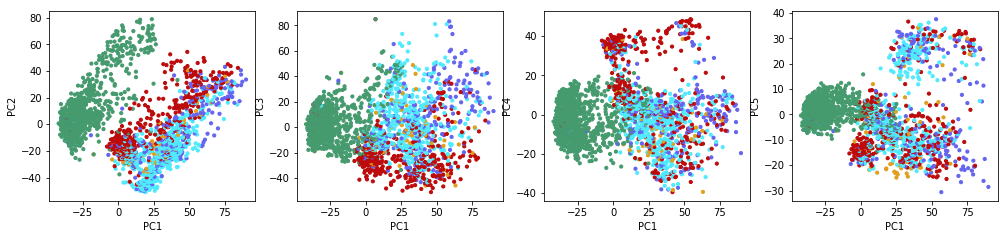

In [245]:
plt.figure(None, (17,3.5))
plt.subplot(141)
vcy.scatter_viz(vlm.pcs[:,0], vlm.pcs[:,1], c=vlm.colorandum,s=10)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.subplot(142)
vcy.scatter_viz(vlm.pcs[:,0], vlm.pcs[:,2], c=vlm.colorandum,s=10)
plt.xlabel("PC1"); plt.ylabel("PC3")
plt.subplot(143)
vcy.scatter_viz(vlm.pcs[:,0], vlm.pcs[:,3], c=vlm.colorandum,s=10)
plt.xlabel("PC1"); plt.ylabel("PC4")
plt.subplot(144)
vcy.scatter_viz(vlm.pcs[:,0], vlm.pcs[:,4], c=vlm.colorandum,s=10)
plt.xlabel("PC1"); plt.ylabel("PC5")

import cytograph

In [246]:
pwd

'/mnt/d/Dropbox/Lab work/Project/GBM_Ready/201907Figures/Figure3/FateDecisioni'

In [247]:
# before run cytograph, you must set the following:
#export PATH=/home/huyiz/anaconda3/envs/newpy36/lib/python3.6/site-packages/cytograph/bhtsne:$PATH 
#export PATH=/home/huyiz/anaconda3/envs/newpy36/lib/python3.6/site-packages/cytograph/bhtsne/bh_tsne:$PATH
#echo 'export /home/huyiz/anaconda3/envs/newpy36/lib/python3.6/site-packages/cytograph/bhtsne:$PATH' >>~/.bash_profile
#echo 'export /home/huyiz/anaconda3/envs/newpy36/lib/python3.6/site-packages/cytograph/bhtsne/bh_tsne:$PATH' >>~/.bash_profile

# Perplexity150,PC19

In [248]:
vlm.ca.keys()

dict_keys(['CellID', 'Cluster', 'PatientID', 'UMAP3', 'UMAP_x', 'UMAP_y', 'UMAP_z', 'Valid', 'WP_x', 'WP_y'])

In [249]:
ts=np.array([vlm.ca['WP_x'].astype(float).tolist(),vlm.ca['WP_y'].astype(float).tolist()])
ts=ts.T
len(ts)

2451

ts = cytograph.TSNE(perplexity=200).layout(vlm.pcs[:,:40])
plt.figure(None,(8,8))
vcy.scatter_viz(ts[:,0], ts[:,1], c=vlm.colorandum, s=10)

In [250]:
vlm.ts = ts

In [251]:
vlm.ts[:,0]

array([-0.76814775,  1.18551571, -0.74755803, ..., -2.46483245,
       -1.59342756, -1.39619601])

In [252]:
vlm.ts

array([[-0.76814775,  1.15971939],
       [ 1.18551571,  1.40660136],
       [-0.74755803,  1.22547721],
       ...,
       [-2.46483245, -2.42487824],
       [-1.59342756, -1.96277682],
       [-1.39619601, -1.83551614]])

ts = cytograph.TSNE(perplexity=300).layout(vlm.pcs[:,:40])
plt.figure(None,(8,8))
vcy.scatter_viz(ts[:,0], ts[:,1], c=vlm.colorandum, s=10)

2021-03-02 15:50:38,676 - DEBUG - update_title_pos
2021-03-02 15:50:38,866 - DEBUG - update_title_pos
2021-03-02 15:50:38,931 - DEBUG - update_title_pos
2021-03-02 15:50:38,985 - DEBUG - update_title_pos


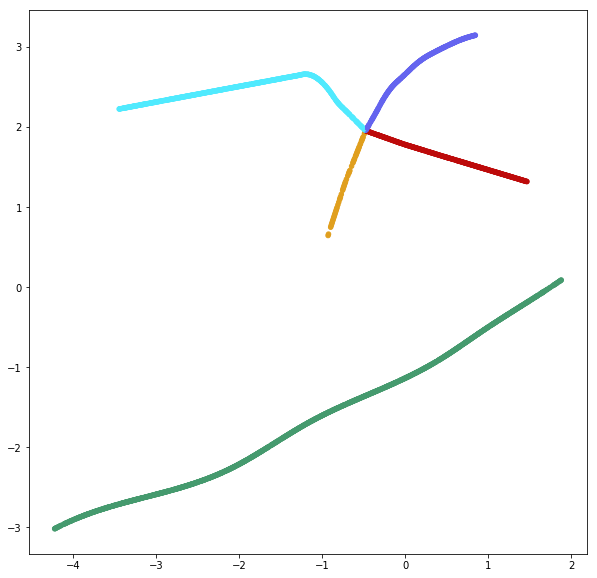

In [253]:

# Plot TSNE# Plot  
plt.figure(figsize=(10,10))
vcy.scatter_viz(vlm.ts[:,0], vlm.ts[:,1], c=vlm.colorandum, s=20)

# K50pcddim10

In [254]:
k = dp["k"] = 500
vlm.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*4, b_maxl=int(k*3), n_jobs=2)
vlm.fit_gammas(limit_gamma=False, fit_offset=True)

2021-03-02 15:50:45,928 - DEBUG - First search the 2000 nearest neighbours for 2451
2021-03-02 15:50:47,645 - DEBUG - Using the initialization network to find a 500-NN graph with maximum connectivity of 1500
2021-03-02 15:50:47,770 - DEBUG - Returning sparse matrix


In [255]:
vlm.predict_U()
vlm.calculate_velocity()
vlm.calculate_shift(assumption="constant_unspliced", delta_t=5)
vlm.extrapolate_cell_at_t(delta_t=5)

In [256]:
len(vlm.ts[:,1])

2451

In [257]:
vlm.estimate_transition_prob(hidim="Sx_sz", embed="ts", transform="sqrt", psc=1,
                             n_neighbors=500, knn_random=True, sampled_fraction=0.2, calculate_randomized=True)

2021-03-02 15:53:05,921 - DEBUG - Calculate KNN in the embedding space


/root/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


2021-03-02 15:53:06,588 - DEBUG - Correlation Calculation 'knn_random'
2021-03-02 15:53:15,674 - DEBUG - Correlation Calculation for negative control
2021-03-02 15:53:24,826 - DEBUG - Done Correlation Calculation


In [258]:
vlm.calculate_embedding_shift(sigma_corr = 0.05, expression_scaling=False)


2021-03-02 15:53:24,949 - DEBUG - Calculate transition probability
2021-03-02 15:53:25,263 - DEBUG - Calculate transition probability for negative control


In [312]:
vlm.calculate_grid_arrows(smooth=0.9, steps=(32, 32), n_neighbors=500)

In [314]:
dfclus[dfumapmerg.index].loc["Cluster"].values

array(['ASTRO', 'ASTRO', 'ASTRO', ..., 'NC_Peri', 'NC_Peri', 'NC_Peri'],
      dtype=object)

In [315]:
newcolorsms=colorscl
newcolorsms[dfclus[dfumapmerg.index].loc["Cluster"].values].values

array([list([0.47058823529411764, 0.058823529411764705, 0.8431372549019608]),
       list([0.47058823529411764, 0.058823529411764705, 0.8431372549019608]),
       list([0.47058823529411764, 0.058823529411764705, 0.8431372549019608]),
       ...,
       list([0.27058823529411763, 0.6078431372549019, 0.43137254901960786]),
       list([0.27058823529411763, 0.6078431372549019, 0.43137254901960786]),
       list([0.27058823529411763, 0.6078431372549019, 0.43137254901960786])],
      dtype=object)

2021-03-02 16:05:04,091 - DEBUG - update_title_pos
2021-03-02 16:05:06,842 - DEBUG - update_title_pos
2021-03-02 16:05:06,879 - DEBUG - update_title_pos
2021-03-02 16:05:06,969 - DEBUG - update_title_pos


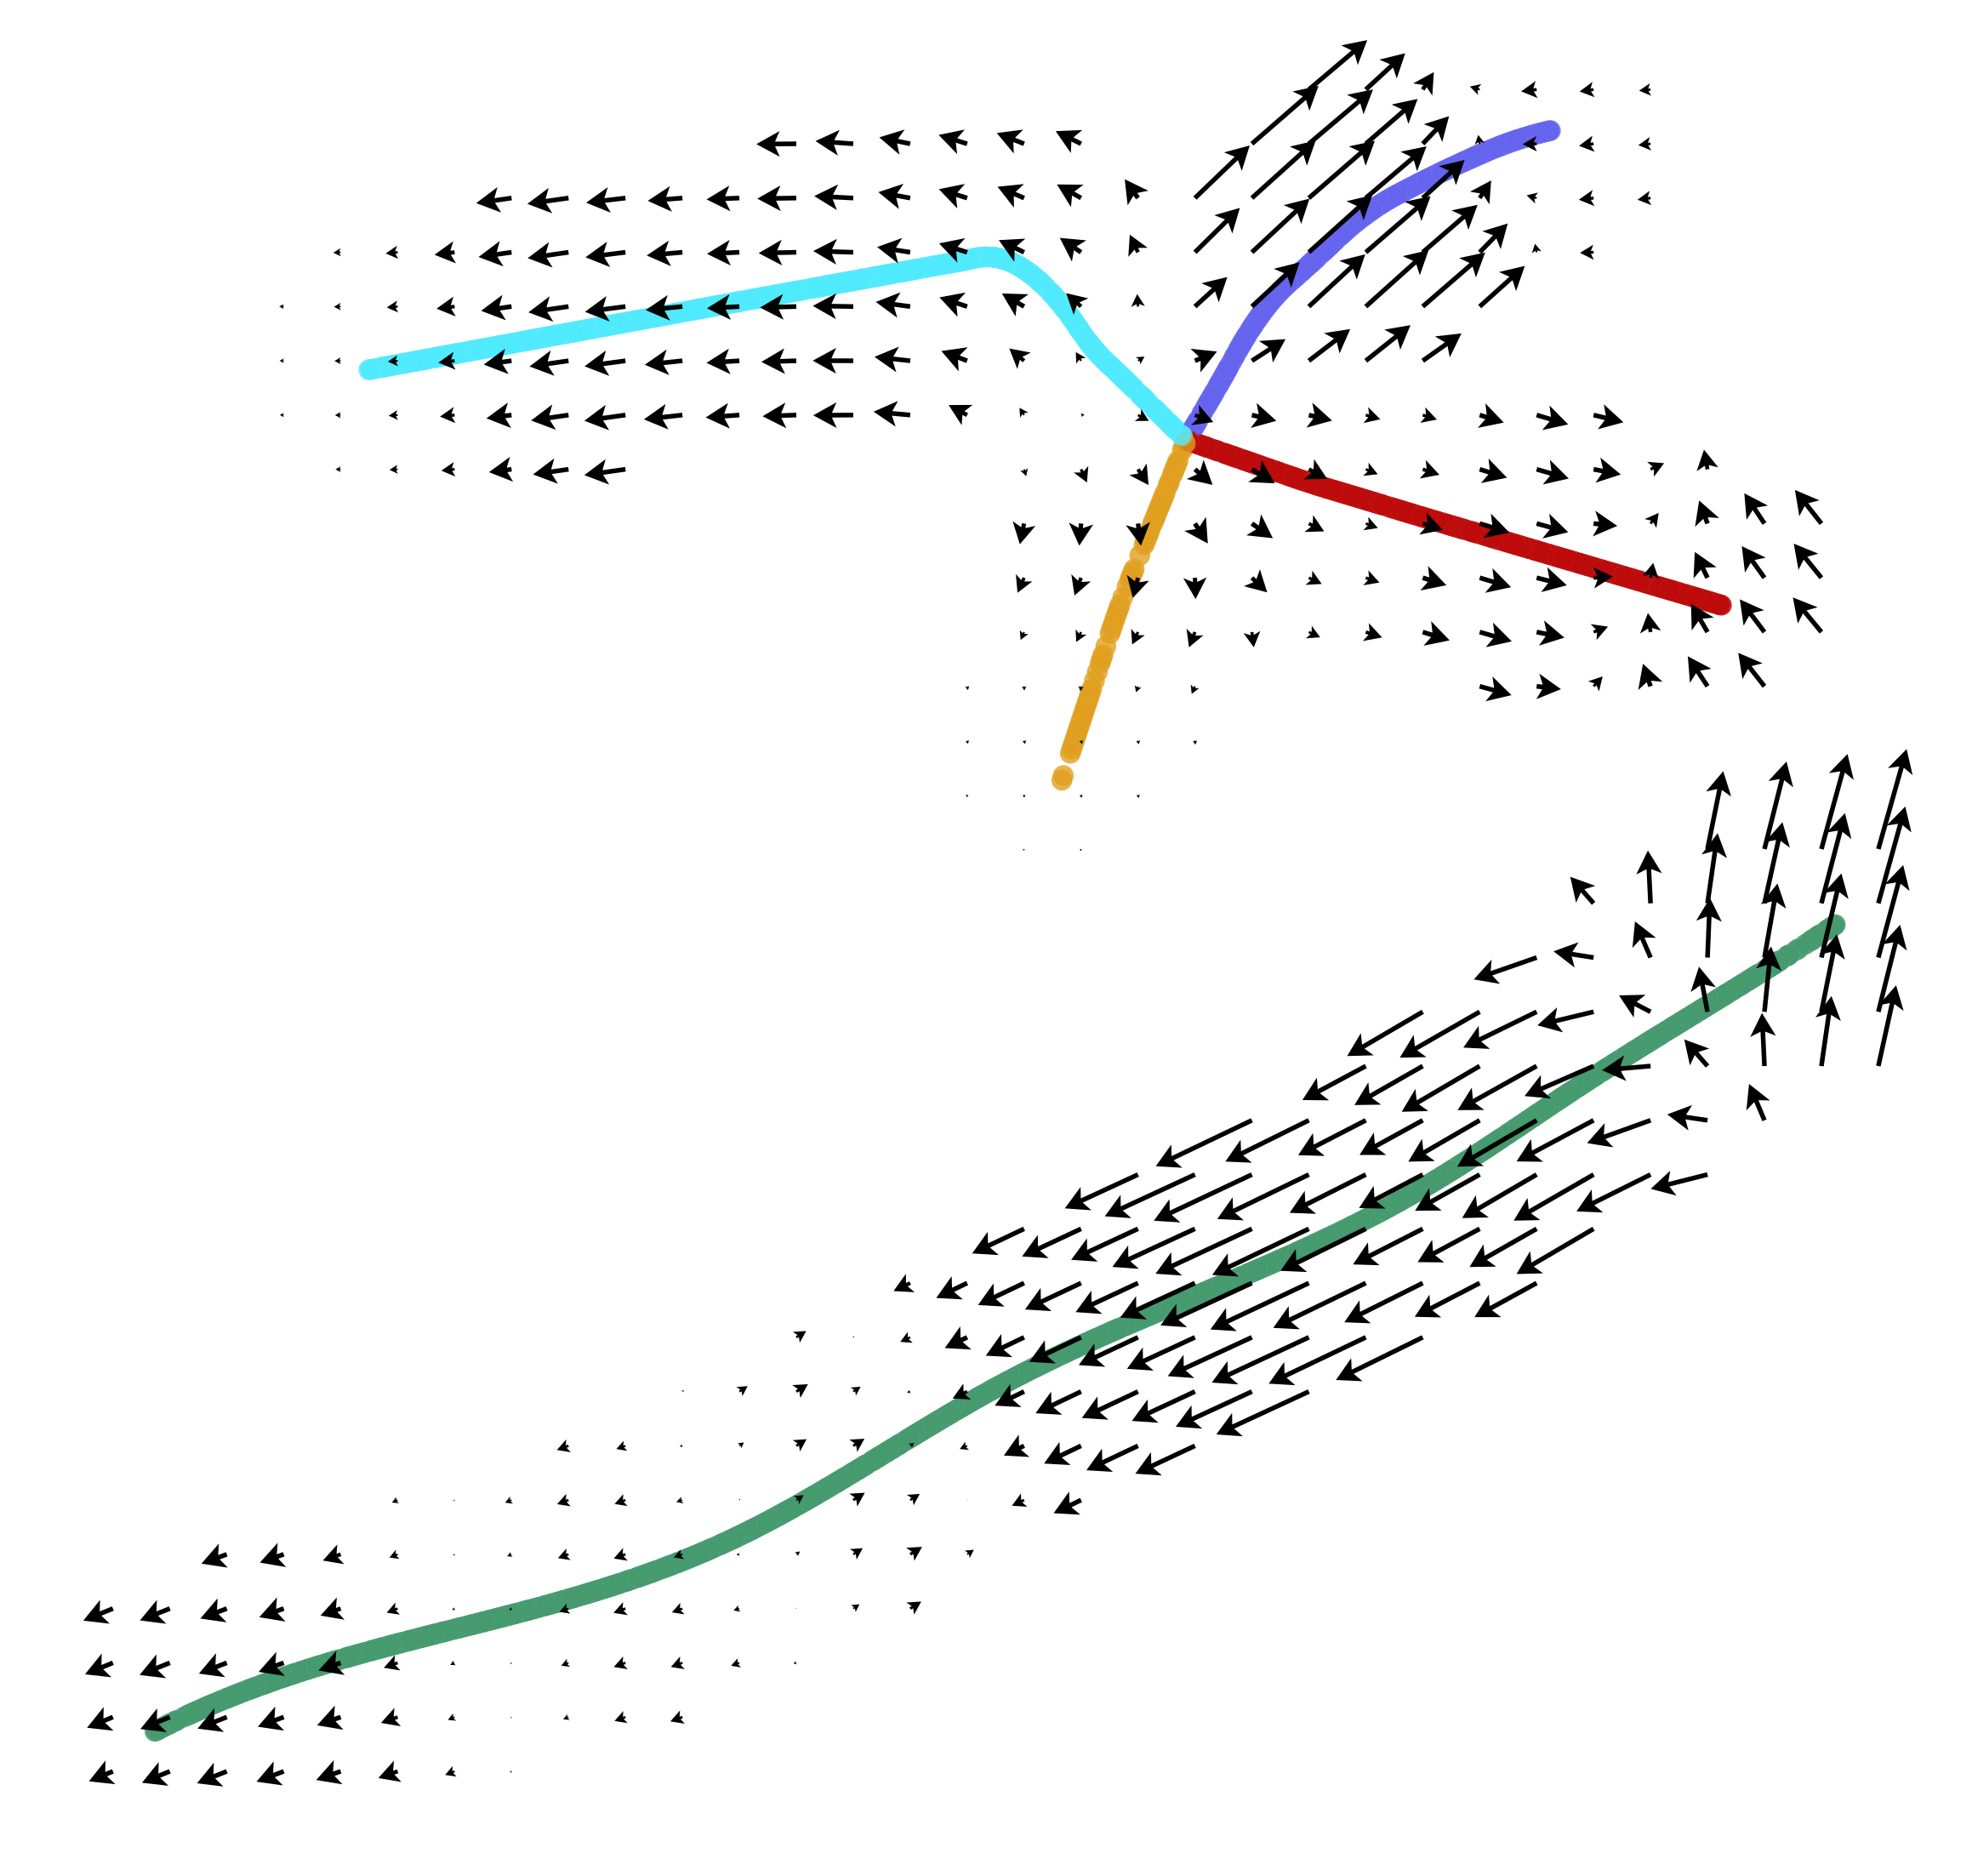

In [316]:
plt.figure(None,(90,40))
plt.subplot(121)
#plt.scatter(dfumapnc.iloc[:,0], dfumapnc.iloc[:,1] , alpha=0.8, c=newcolorsms[dfclus[dfumapnc.index].loc["Cluster"].values].values, s =600, lw=0.2)
vlm.plot_grid_arrows(quiver_scale=3.5,
                     scatter_kwargs_dict={"alpha":0.8, "lw":0.05, "edgecolor":"1", "s":600, "rasterized":True},
                     min_mass=1.5, 
                     angles='xy', 
                     scale_units='xy',
                     headaxislength=4, headlength=5, headwidth=5.5, minlength=0.01,
                     plot_dots=True,
                     plot_random=False, 
                     #scale_type="relative"
                    )

/root/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


2021-03-02 16:05:08,357 - DEBUG - update_title_pos
2021-03-02 16:05:08,524 - DEBUG - update_title_pos
2021-03-02 16:05:11,567 - DEBUG - update_title_pos
2021-03-02 16:05:11,595 - DEBUG - update_title_pos
2021-03-02 16:05:11,636 - DEBUG - update_title_pos
2021-03-02 16:05:11,661 - DEBUG - update_title_pos
2021-03-02 16:05:11,786 - DEBUG - update_title_pos
2021-03-02 16:05:11,999 - DEBUG - update_title_pos


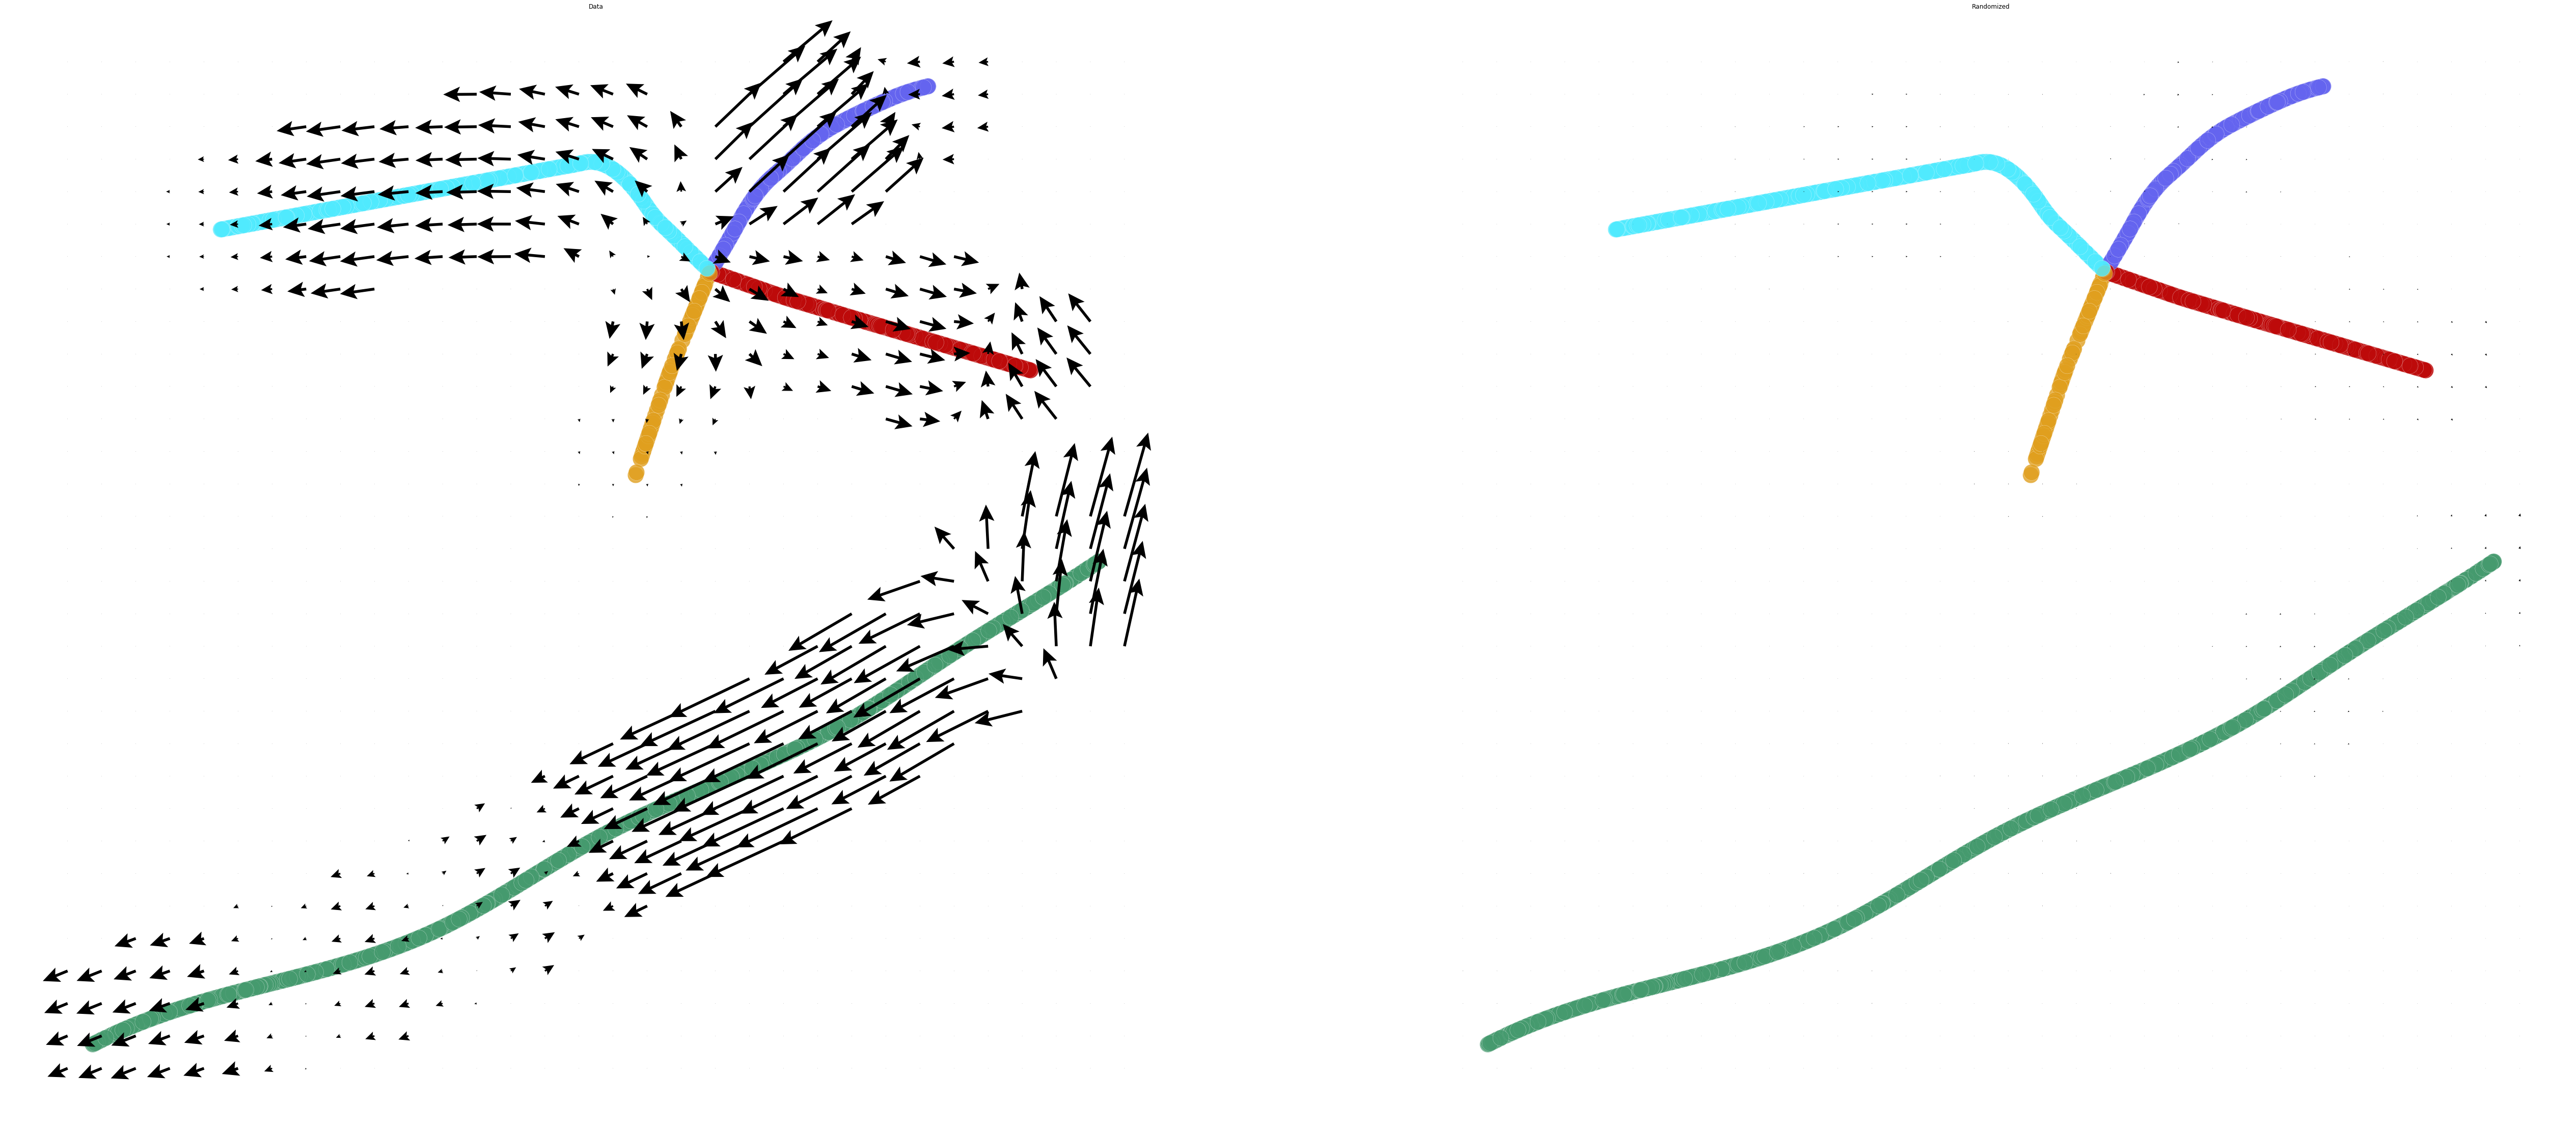

In [317]:
plt.figure(None,(90,40))
plt.subplot(121)
#plt.scatter(dfumapnc.iloc[:,0], dfumapnc.iloc[:,1] , alpha=0.8, c=newcolorsms[dfclus[dfumapnc.index].loc["Cluster"].values].values, s =600, lw=0.2)
vlm.plot_grid_arrows(quiver_scale=2.5,
                     scatter_kwargs_dict={"alpha":0.8, "lw":0.35, "edgecolor":"1", "s":1000, "rasterized":True},
                     min_mass=1.5, angles='xy', scale_units='xy',
                     headaxislength=5, headlength=6, headwidth=5.5, minlength=0.1,plot_dots=True,
                     plot_random=True, scale_type="relative")

2021-03-02 16:05:22,781 - DEBUG - update_title_pos
2021-03-02 16:05:22,892 - DEBUG - update_title_pos
2021-03-02 16:05:22,923 - DEBUG - update_title_pos
2021-03-02 16:05:22,940 - DEBUG - update_title_pos


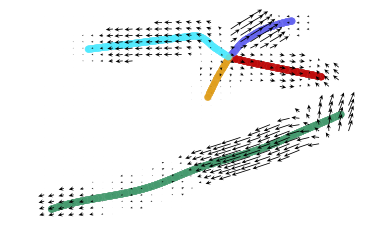

In [319]:
vlm.plot_grid_arrows(quiver_scale=3,
                     scatter_kwargs_dict={"alpha":0.8, "lw":0.05, "edgecolor":"1", "s":50, "rasterized":True},
                     min_mass=1.5, 
                     angles='xy', scale_units='xy',
                     headaxislength=4, headlength=6, headwidth=5.5, minlength=0.1,plot_dots=True,
                     plot_random=False, scale_type="relative")

In [320]:
dfposi.head()

,uMAP2,uMAP1,Cluster
Brain.Mural4_O6,-3.166052758693695,-3.8459296226501465,PeriC
Brain.Mural4_D17,-3.5557348132133484,-2.739692211151123,PeriC
Brain.Mural3_J11,-3.26658171415329,-5.611094951629639,PeriC
Brain.Mural4_O24,-2.4849286675453186,-4.634734630584717,SMC
Brain.Mural6_L17,-2.8608075976371765,-4.025484561920166,PeriC


In [321]:
set(dfposi["Cluster"])

{'Astro',
 'Meni_FB',
 'Meni_Rgl',
 'NB',
 'NC_EarlyMigr',
 'NC_Mes',
 'NC_Migr',
 'NC_auto',
 'NC_delami',
 'NC_sensory',
 'NeuralTube',
 'OLIG',
 'PeriC',
 'SMC',
 'VFBC',
 'aRgl',
 'qRgl'}

In [322]:
dfumapmerg

,Cluster,Tree_X,Tree_Y,Tree_Color
KI003-1773-030-092-H11,ASTRO,-0.471269,1.961573,#ff0000
KI003-1773-030-093-B01,ASTRO,-0.466562,1.970085,#fe0000
KI016-1773-033-195-F01,ASTRO,-0.461856,1.978598,#fe0001
KI006-1773-017-081-C04,ASTRO,-0.457149,1.987111,#fd0001
KI016-1773-033-197-E06,ASTRO,-0.452442,1.995625,#fc0002
...,...,...,...,...
KI021-1773-033-247-H09,NC_Peri,1.867090,0.077683,#d6f8cf
KI020-1773-026-011-C03,NC_Peri,1.870676,0.080216,#d6f9cf
KI016-1773-033-248-B10,NC_Peri,1.874262,0.082751,#d6f9cf
KI021-1773-033-246-H04,NC_Peri,1.877848,0.085290,#d7f9cf


2021-03-02 16:08:47,627 - DEBUG - update_title_pos
2021-03-02 16:08:48,324 - DEBUG - update_title_pos
2021-03-02 16:08:48,400 - DEBUG - update_title_pos
2021-03-02 16:08:48,461 - DEBUG - update_title_pos


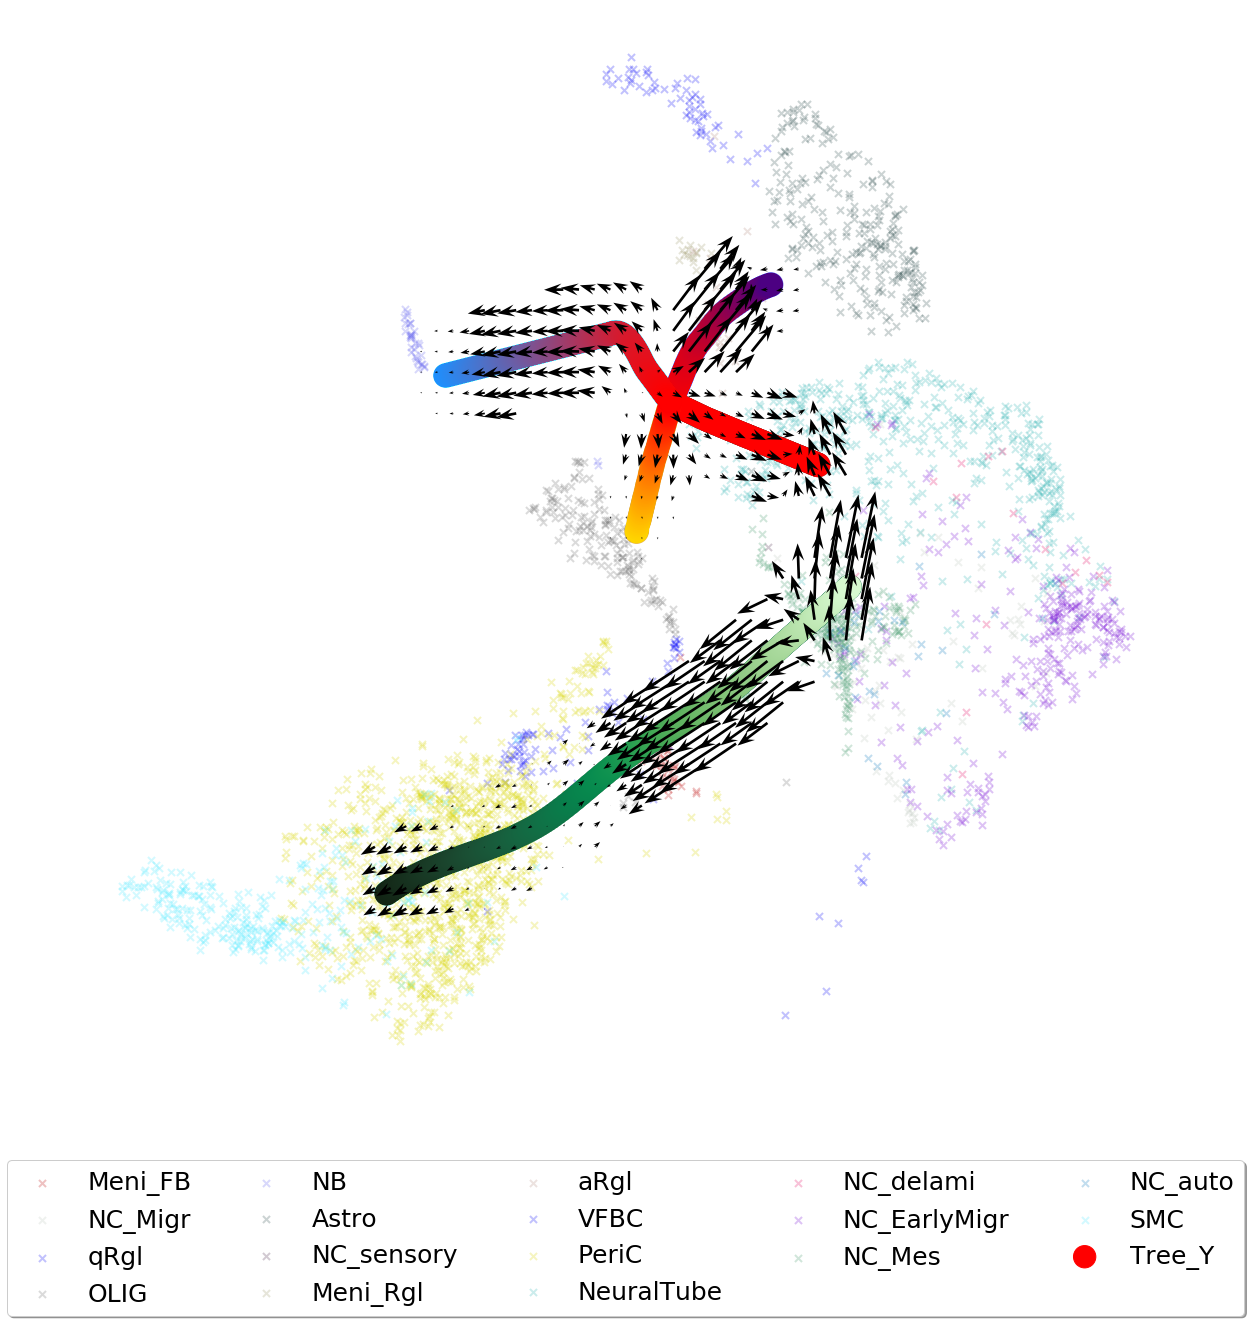

In [326]:
plt.figure(figsize=(20,20), facecolor='w')
colors=mcolor_dict
clusterlist=list(set(dfposi["Cluster"]))
for i in range(len(clusterlist)):
    plt.scatter(dfposi.loc[dfposi["Cluster"]==clusterlist[i]].iloc[:,-2].astype(float), 
                dfposi.loc[dfposi["Cluster"]==clusterlist[i]].iloc[:,-3].astype(float), 
                color=colors[clusterlist[i]], alpha=.25, lw=2, marker='x', s=50,label=clusterlist[i])

vlm.plot_grid_arrows(quiver_scale=2,
                     scatter_kwargs_dict={"alpha":0.8, "lw":0.05, "edgecolor":"1", "s":600, "rasterized":True},
                     min_mass=1.5, 
                     angles='xy', 
                     scale_units='xy',
                     headaxislength=4.5, headlength=6.5, headwidth=4.5, minlength=0.01,
                     plot_dots=True,
                     plot_random=False, 
                     #scale_type="relative"
                    )
plt.scatter(dfumapmerg["Tree_X"],dfumapmerg["Tree_Y"],c=dfumapmerg["Tree_Color"],s=500)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fontsize=25, fancybox=True, shadow=True, ncol=5)

(-4.497827468101193, 2.806699780731334, -3.311241154021111, 4.130053867397329)

2021-03-02 15:55:03,312 - DEBUG - update_title_pos
2021-03-02 15:55:03,771 - DEBUG - update_title_pos
2021-03-02 15:55:03,796 - DEBUG - update_title_pos
2021-03-02 15:55:03,814 - DEBUG - update_title_pos


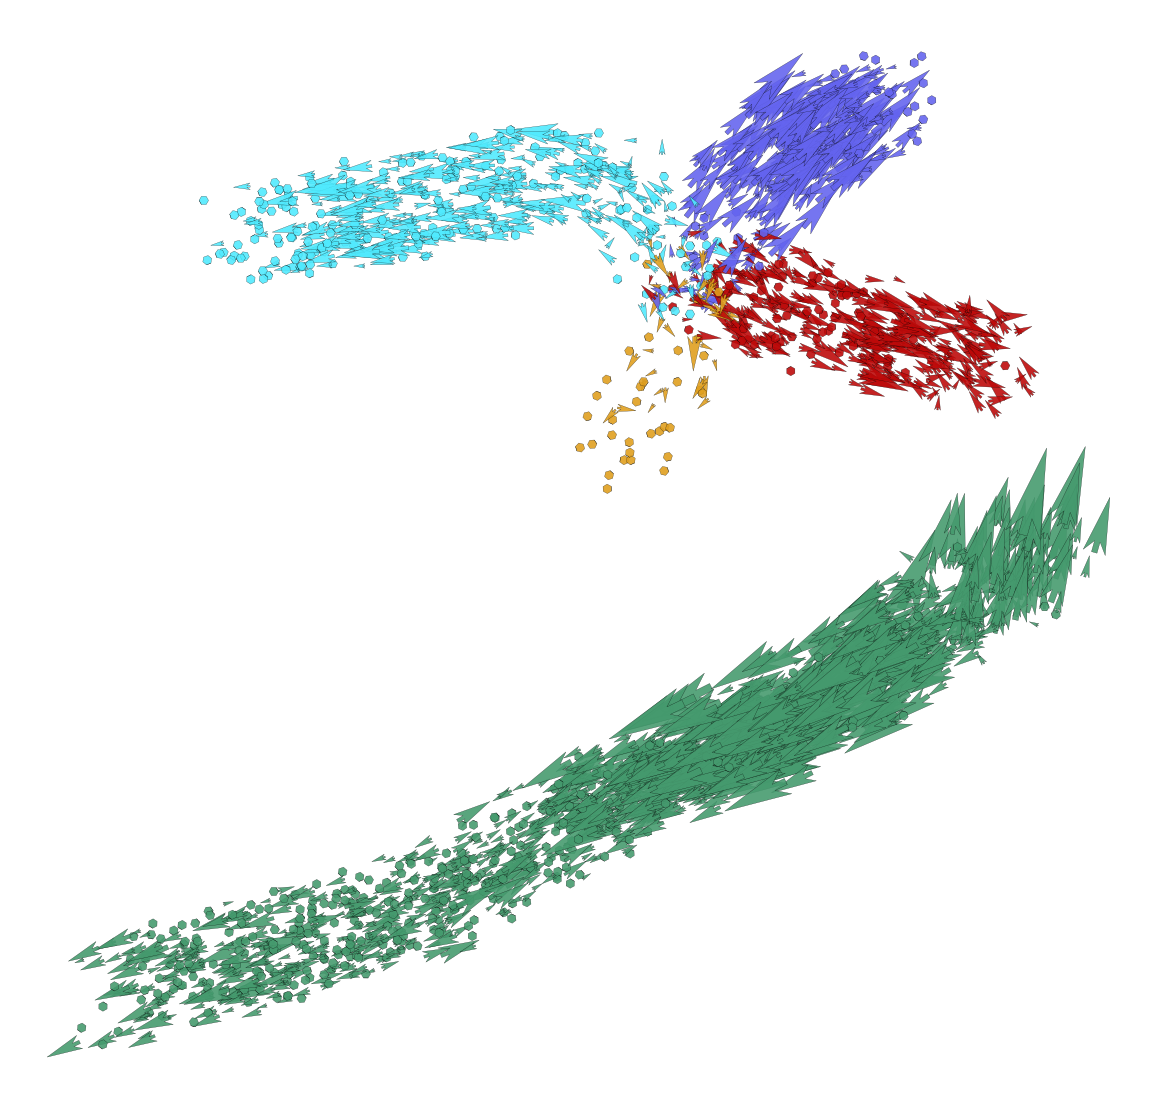

In [269]:
plt.figure(None,(20,20))
quiver_scale = 15

#plt.scatter(vlm.embedding[:, 0], vlm.embedding[:, 1],
#            c="0.8", alpha=0.4, s=100, edgecolor="")

#ix_choice = np.random.choice(vlm.embedding.shape[0], size=int(vlm.embedding.shape[0]/1.), replace=False)
#plt.scatter(xtest, ytest , alpha=0.8, c=newcolorsms[bool00ms,:], s=100, edgecolor="k", linewidths=0.65, rasterized=True)
#plt.scatter(vlm.embedding[:, 0], vlm.embedding[:, 1],
 #           c="0.8", alpha=0.8, s=100, edgecolor=(0,0,0,1), lw=0.2,rasterized=True)

quiver_kwargs=dict(headaxislength=8, headlength=10, headwidth=4,
                   linewidths=0.25, 
                   width=0.0085,edgecolors="k", color= vlm.colorandum, alpha=0.89)
plt.quiver(vlm.embedding[:, 0]+np.random.choice(1000, 2451)/1500,vlm.embedding[:, 1]+np.random.choice(1000, 2451)/1500,
           vlm.delta_embedding[:, 0], vlm.delta_embedding[:, 1],
           scale=quiver_scale, **quiver_kwargs)

plt.axis("off")